# ELIZABETH
#### URL and API Call

In [1]:
# Dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Census API Key
from api_keys import census_api_key

# API Key + States to call
API_KEY = census_api_key
state = 'state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56'

# URL
employment_2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'

## JSON Requests and Employment DataFrames

In [2]:
# json get request
employment_2022_json = requests.get(employment_2022_url).json()
employment_2021_json = requests.get(employment_2021_url).json()
employment_2019_json = requests.get(employment_2019_url).json()
employment_2018_json = requests.get(employment_2018_url).json()
employment_2017_json = requests.get(employment_2017_url).json()

# create employment dataframe
employment_2022_df = pd.DataFrame(requests.get(employment_2022_url).json()[1:], columns=requests.get(employment_2022_url).json()[0])
employment_2021_df = pd.DataFrame(requests.get(employment_2021_url).json()[1:], columns=requests.get(employment_2021_url).json()[0])
employment_2019_df = pd.DataFrame(requests.get(employment_2019_url).json()[1:], columns=requests.get(employment_2019_url).json()[0])
employment_2018_df = pd.DataFrame(requests.get(employment_2018_url).json()[1:], columns=requests.get(employment_2018_url).json()[0])
employment_2017_df = pd.DataFrame(requests.get(employment_2017_url).json()[1:], columns=requests.get(employment_2017_url).json()[0])

# rename group code columns with descriptions
employment_2022_df_cleaned = employment_2022_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2021_df_cleaned = employment_2021_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2019_df_cleaned = employment_2019_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2018_df_cleaned = employment_2018_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2017_df_cleaned = employment_2017_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})

# add year column
employment_2022_df_cleaned['Year'] = 2022
employment_2021_df_cleaned['Year'] = 2021
employment_2019_df_cleaned['Year'] = 2019
employment_2018_df_cleaned['Year'] = 2018
employment_2017_df_cleaned['Year'] = 2017

# extract specific columns for final dataframe
employment_2022_df_final = employment_2022_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2021_df_final = employment_2021_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2019_df_final = employment_2019_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2018_df_final = employment_2018_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2017_df_final = employment_2017_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]

# remove duplicate NAME columns
employment_2022_df_final = employment_2022_df_final.loc[:, ~employment_2022_df_final.columns.duplicated()]
employment_2021_df_final = employment_2021_df_final.loc[:, ~employment_2021_df_final.columns.duplicated()]
employment_2019_df_final = employment_2019_df_final.loc[:, ~employment_2019_df_final.columns.duplicated()]
employment_2018_df_final = employment_2018_df_final.loc[:, ~employment_2018_df_final.columns.duplicated()]
employment_2017_df_final = employment_2017_df_final.loc[:, ~employment_2017_df_final.columns.duplicated()]

# combine dataframes
combined_employment_df = pd.concat([employment_2022_df_final, 
                                   employment_2021_df_final, 
                                   employment_2019_df_final, 
                                   employment_2018_df_final, 
                                   employment_2017_df_final], 
                                  axis=0)

# reset index column to not repeat individual df index aka 0-50 would be shown 5 times vs now reset and we see unique index 0-254
combined_employment_df.reset_index(drop=True, inplace=True)

# # csv output
# combined_employment_df.to_csv('Data/combined_employment_data.csv')

# table output
combined_employment_df

,Year,State,Total in Labor Force,Total Unemployed in Civilian Labor Force
0,2022,Alabama,2398213,103239
1,2022,Alaska,386093,16484
2,2022,Arizona,3619698,153937
3,2022,Arkansas,1404190,62359
4,2022,California,20174168,1060822
...,...,...,...,...
250,2017,Maine,702420,29493
251,2017,Maryland,3294443,170419
252,2017,Massachusetts,3776331,172091
253,2017,Michigan,4949724,291020


In [3]:
# state population data from https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/state/totals/
state_2022_population = {
    'Alabama' : 5073903,
    'Alaska' : 733276,
    'Arizona' : 7365684,
    'Arkansas' : 3046404,
    'California' : 39040616,
    'Colorado' : 5841039,
    'Connecticut' : 3608706,
    'Delaware' : 1019459,
    'District of Columbia' : 670949,
    'Florida' : 22245521,
    'Georgia' : 10913150,
    'Hawaii' : 1439399,
    'Idaho' : 1938996,
    'Illinois' : 12582515,
    'Indiana' : 6832274,
    'Iowa' : 3199693,
    'Kansas' : 2936716,
    'Kentucky' : 4511563,
    'Louisiana' : 4588023,
    'Maine' : 1389338,
    'Maryland' : 6163981,
    'Massachusetts' : 6982740,
    'Michigan' : 10033281,
    'Minnesota' : 5714300,
    'Mississippi' : 2938928,
    'Missouri' : 6177168,
    'Montana' : 1122878,
    'Nebraska' : 1968060,
    'Nevada' : 3177421,
    'New Hampshire' : 1399003,
    'New Jersey' : 9260817,
    'New Mexico' : 2113476,
    'New York' : 19673200,
    'North Carolina' : 10695965,
    'North Dakota' : 778912,
    'Ohio' : 11759697,
    'Oklahoma' : 4019271,
    'Oregon' : 4239379,
    'Pennsylvania' : 12972091,
    'Rhode Island' : 1093842,
    'South Carolina' : 5282955,
    'South Dakota' : 909869,
    'Tennessee' : 7048976,
    'Texas' : 30029848,
    'Utah' : 3381236,
    'Vermont' : 647110,
    'Virginia' : 8679099,
    'Washington' : 7784477,
    'West Virginia' : 1774035,
    'Wisconsin' : 5890543,
    'Wyoming' : 581629
}

state_2022_population_df = pd.DataFrame(list(state_2022_population.items()), columns = ['State', 'Population'])

## Merge CSV Data to create a final DataFrame used to create visuals

In [4]:
# Files to Load
opioid_deaths_to_load = Path('Data/opioid_death_counts.csv')
employment_data_to_load = Path('Data/combined_employment_data.csv')

# # Read Drug Overdose Data File and store into Pandas DataFrames
opioid_csv = pd.read_csv(opioid_deaths_to_load, index_col = 0)
employment_csv = pd.read_csv(employment_data_to_load, index_col = 0)

# merge csv files
employment_vs_opioid_df = pd.merge(employment_csv, opioid_csv, on=['State', 'Year'], how='left')

filtered_df = employment_vs_opioid_df[employment_vs_opioid_df['Year'] == 2022]

merged_2022_df = pd.merge(filtered_df, state_2022_population_df, on=['State'], how='left')

merged_2022_df['Percent State Unemployed vs State Population'] = (merged_2022_df['Total Unemployed in Civilian Labor Force'] / merged_2022_df['Population'])
merged_2022_df['Percent State Deaths State Population'] = (merged_2022_df['Total Opioid Deaths'] / merged_2022_df['Population'])
merged_2022_df['Percent Unemployed vs Percent Deaths'] = (merged_2022_df['Percent State Unemployed vs State Population'] / merged_2022_df['Percent State Deaths State Population'])/ 100

contribution_df = merged_2022_df[[
    'State',
    'Percent State Unemployed vs State Population',
    'Percent State Deaths State Population',
    'Percent Unemployed vs Percent Deaths'
]]

contribution_df

,State,Percent State Unemployed vs State Population,Percent State Deaths State Population,Percent Unemployed vs Percent Deaths
0,Alabama,0.020347,0.000200,1.016354
1,Alaska,0.022480,0.000253,0.888226
2,Arizona,0.020899,0.000269,0.776186
3,Arkansas,0.020470,0.000127,1.607881
4,California,0.027172,0.000197,1.376693
5,Colorado,0.019388,0.000214,0.905892
6,Connecticut,0.025659,0.000379,0.677250
7,Delaware,0.021847,0.000456,0.479483
8,District of Columbia,0.030105,0.000634,0.474619
9,Florida,0.019549,0.000269,0.726669


# Heatmap of Contribution Ratio


Contribution Ratio Indicators:

Ratio > 1: Indicates that unemployment is disproportionately higher relative to opioid related deaths in that state.
Ratio = 1: Indicates a balance between contributions to unemployment and opioid deaths.
Ratio < 1: Indicates that suggesting that unemployment is disproportionately lower relative to opioid related deaths in that state.



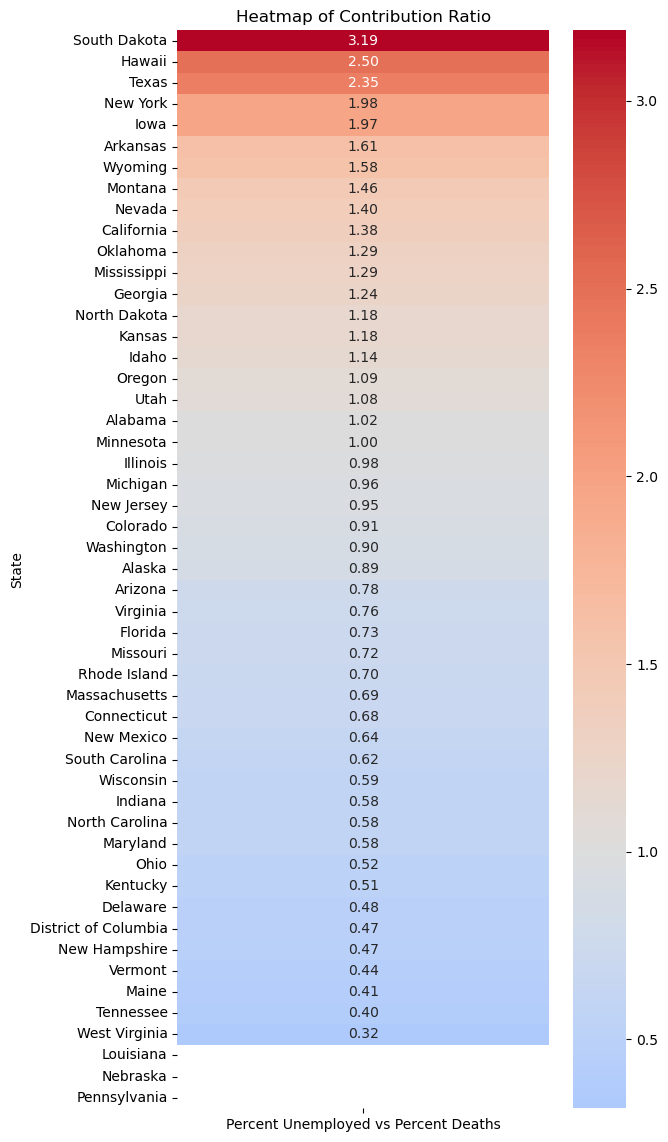

In [5]:
# sort for heatmap to be greatest to smallest
sorted_contribution_df = contribution_df.sort_values('Percent Unemployed vs Percent Deaths', ascending=False)

# set up heatmap
plt.figure(figsize=(6, 14))
sns.heatmap(sorted_contribution_df.set_index('State')[['Percent Unemployed vs Percent Deaths']], annot=True, fmt='.2f',cmap='coolwarm', center=1)
plt.title('Heatmap of Contribution Ratio')

# print indication notes and show output
print("\n\033[4mContribution Ratio Indicators\033[0m:\n")
print("Ratio > 1: Indicates that unemployment is disproportionately higher relative to opioid related deaths in that state.")
print("Ratio = 1: Indicates a balance between contributions to unemployment and opioid deaths.")
print("Ratio < 1: Indicates that suggesting that unemployment is disproportionately lower relative to opioid related deaths in that state.\n")

# save heatmap png to images folder
# plt.savefig('Images/heatmap-contribution-ratio.png', dpi=300, bbox_inches='tight')
plt.show()



In [6]:
# states with no records
states_to_exclude = ['Louisiana', 'Pennsylvania', 'Nebraska']

# isolate states only with recorded opioid data
contribution_adj_df = contribution_df[
    (~contribution_df['State'].isin(states_to_exclude))
] 

# calculated fields and pivot
pivot_df_2022 = contribution_adj_df.pivot_table(
    index = 'State',
    aggfunc = 'first'
).reset_index()

# create opioid rank column in pivot_df_2022
pivot_df_2022['Opioid Death Rank'] = pivot_df_2022['Percent State Deaths State Population'].rank(ascending=False)
pivot_df_2022['State Unemployment Rank'] = pivot_df_2022['Percent State Unemployed vs State Population'].rank(ascending=False)

# set up for formatting
summary_2022 = pivot_df_2022 [[
    'State',
    'Opioid Death Rank',
    'State Unemployment Rank'
]]

summary_2022 = summary_2022.fillna(0)
summary_2022['Opioid Death Rank'] = summary_2022['Opioid Death Rank'].rank(method='min').astype(int)
summary_2022['State Unemployment Rank'] = summary_2022['State Unemployment Rank'].rank(method='min').astype(int)
sorted_2022_summary = summary_2022.sort_values('Opioid Death Rank', ascending=True)

# contribution table for 
formatted_2022_summary = sorted_2022_summary.style \
    .set_properties(**{'text-align': 'center'}) \
    .set_caption("2022 Ranks: State Unemployment Rates and Opioid Related Deaths") \
    .hide(axis='index')

# output
formatted_2022_summary


State,Opioid Death Rank,State Unemployment Rank
West Virginia,1,23
District of Columbia,2,1
Delaware,3,16
Tennessee,4,38
Maine,5,39
Kentucky,6,22
Connecticut,7,6
Maryland,8,17
Ohio,9,30
Vermont,10,42


In [7]:
# formatted_2022_summary.to_html('Images/2022_Unemployment_Percent_Opioid_Death_Rank.html')

# Pie Chart Visual
### % Unemployed + Opioid Deaths by Year(2017-2022)

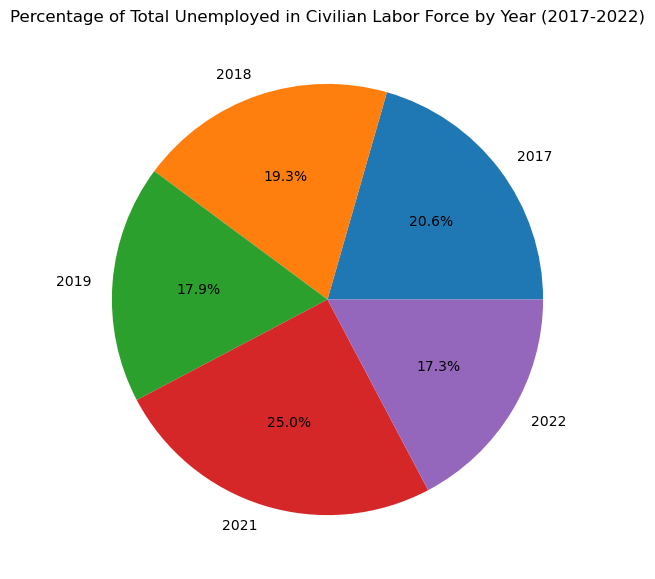

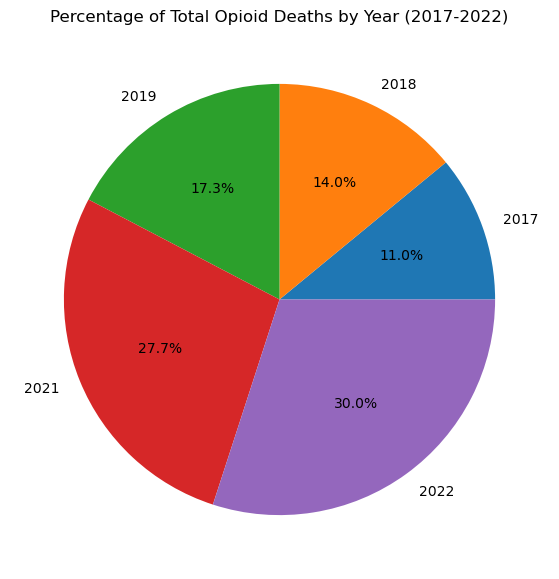

In [8]:
import matplotlib.pyplot as plt

# aggregate data by state
state_aggregated_df = employment_vs_opioid_df.groupby('Year').agg({
    'Total Unemployed in Civilian Labor Force': 'sum',
    'Total Opioid Deaths': 'sum'
}).reset_index()

# unemployed pie chart
plt.figure(figsize=(10,7))
plt.pie(state_aggregated_df['Total Unemployed in Civilian Labor Force'], labels = state_aggregated_df['Year'], autopct='%1.1f%%')
plt.title('Percentage of Total Unemployed in Civilian Labor Force by Year (2017-2022)')
plt.show()

# opioid death pie chart
plt.figure(figsize=(10,7))
plt.pie(state_aggregated_df['Total Opioid Deaths'], labels = state_aggregated_df['Year'], autopct='%1.1f%%')
plt.title('Percentage of Total Opioid Deaths by Year (2017-2022)')
plt.show()

Right now we cannot come to any conclusions to determine if unemployment rate overlaps with the specific opioid deaths. We would be able to make a better judgement if we had the employment status for the indiviual persons part if the death rates from opioids. Its interesting because one might say unemployment has an OPPOSITE impact on opoid deaths, 2022 had the highest unemployment rates and the lowest deaths. Whereas 2017 had the lowest unemployment rates and the second highest death rate. 